<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
    !wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2018-12-24 00:13:15--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2018-12-24 00:13:15 (12.6 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
print(df.shape)
df.dtypes

(346, 10)


Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

### Convert to date time object 

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [6]:
    df.dtypes

Unnamed: 0                 int64
Unnamed: 0.1               int64
loan_status               object
Principal                  int64
terms                      int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
age                        int64
education                 object
Gender                    object
dtype: object

# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [7]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [8]:
# notice: installing seaborn might takes a few minutes
# !conda install -c anaconda seaborn -y

[  300.           377.77777778   455.55555556   533.33333333   611.11111111
   688.88888889   766.66666667   844.44444444   922.22222222  1000.        ]


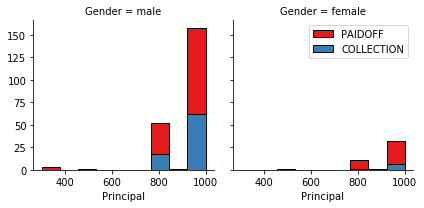

In [9]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
print(bins)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

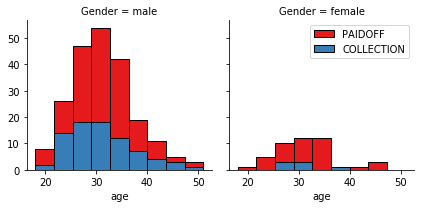

In [10]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

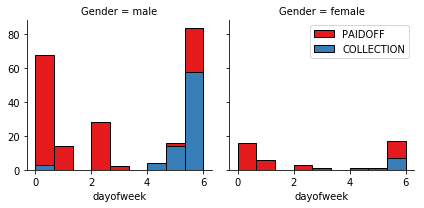

In [11]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [12]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [13]:

df_tmp = df.copy(deep=False)
df_tmp['friday']=df_tmp['dayofweek'].apply(lambda x: 'T' if (x==4) else 'F')
df_tmp.head(20)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,friday
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0,F
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0,F
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0,F
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1,T
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1,T
5,7,7,PAIDOFF,1000,30,2016-09-09,2016-10-08,36,college,male,4,1,T
6,8,8,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,male,4,1,T
7,9,9,PAIDOFF,800,15,2016-09-10,2016-09-24,26,college,male,5,1,F
8,10,10,PAIDOFF,300,7,2016-09-10,2016-09-16,29,college,male,5,1,F
9,11,11,PAIDOFF,1000,15,2016-09-10,2016-10-09,39,High School or Below,male,5,1,F


## Convert Categorical features to numerical values

Lets look at gender:

In [14]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [15]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [16]:
# just to learn
df_tmp['friday'].replace(to_replace=['F','T'], value=[0,1], inplace=True)
df_tmp.head(10)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,friday
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1,1
5,7,7,PAIDOFF,1000,30,2016-09-09,2016-10-08,36,college,0,4,1,1
6,8,8,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,0,4,1,1
7,9,9,PAIDOFF,800,15,2016-09-10,2016-09-24,26,college,0,5,1,0
8,10,10,PAIDOFF,300,7,2016-09-10,2016-09-16,29,college,0,5,1,0
9,11,11,PAIDOFF,1000,15,2016-09-10,2016-10-09,39,High School or Below,0,5,1,0


## One Hot Encoding  
#### How about education?

In [17]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [18]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [19]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [20]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [21]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

## label encoded to 0/1

In [22]:

y_dum = pd.get_dummies(y)
y_dum[0:5]

,COLLECTION,PAIDOFF
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [23]:
y_dum.drop(['PAIDOFF'], axis = 1,inplace=True)
y_dum.head()

,COLLECTION
0,0
1,0
2,0
3,0
4,0


In [24]:
y_dum_ok = y_dum['COLLECTION'].values
y_dum_ok.mean()

0.24855491329479767

In [25]:
y_dum_ok[:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1,

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [26]:
scaler = preprocessing.StandardScaler().fit(X)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
X = scaler.transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [28]:
# bylo:
# X= preprocessing.StandardScaler().fit(X).transform(X)
# scaler = preprocessing.StandardScaler()
# X[0:5]

### TRAIN TEST SPLIT

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y_dum_ok, test_size = 0.25, random_state = 1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
Y_test[1:5]

(259, 8)
(259,)
(87, 8)
(87,)


array([1, 1, 0, 1], dtype=uint8)

In [30]:
print(1-Y_train.mean())
print(1-Y_test.mean())

0.752895752896
0.747126436782


# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# from sklearn.metrics import jaccard_similarity_score
# from sklearn.metrics import f1_score
# from sklearn.metrics import log_loss

In [32]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

f1_ = np.zeros((Ks-1))
ll_ = np.zeros((Ks-1))
jc_ = np.zeros((Ks-1))

ConfustionMx = [];
for n in range(1,Ks):
    #Train KNN
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])
    
    f1_[n-1] = metrics.f1_score(Y_test, yhat)
    ll_[n-1] = metrics.log_loss(Y_test, yhat)
    jc_[n-1] = metrics.jaccard_similarity_score(Y_test, yhat)

print('--acc--')
print(mean_acc)
print('--f1--')
print(f1_)
print('--logloss--')
print(ll_)
print('--jaccard--')
print(jc_)

--acc--
[ 0.62068966  0.75862069  0.71264368  0.77011494  0.74712644  0.73563218
  0.77011494  0.74712644  0.72413793  0.73563218  0.72413793  0.73563218
  0.72413793  0.73563218  0.75862069  0.75862069  0.72413793  0.77011494
  0.77011494]
--f1--
[ 0.29787234  0.22222222  0.32432432  0.375       0.42105263  0.25806452
  0.44444444  0.26666667  0.36842105  0.34285714  0.36842105  0.25806452
  0.33333333  0.14814815  0.43243243  0.16        0.33333333  0.23076923
  0.28571429]
--logloss--
[ 13.10108062   8.33696441   9.92501846   7.93998536   8.73401698
   9.13098684   7.94000374   8.73398022   9.52802103   9.13100522
   9.52802103   9.13098684   9.52801184   9.13096846   8.33701036
   8.33695522   9.52801184   7.93995779   7.93996698]
--jaccard--
[ 0.62068966  0.75862069  0.71264368  0.77011494  0.74712644  0.73563218
  0.77011494  0.74712644  0.72413793  0.73563218  0.72413793  0.73563218
  0.72413793  0.73563218  0.75862069  0.75862069  0.72413793  0.77011494
  0.77011494]


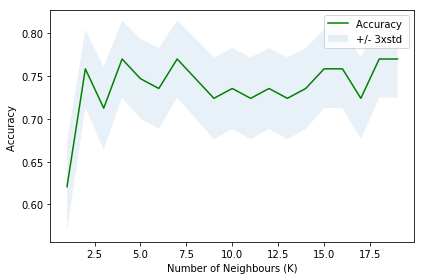

In [33]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

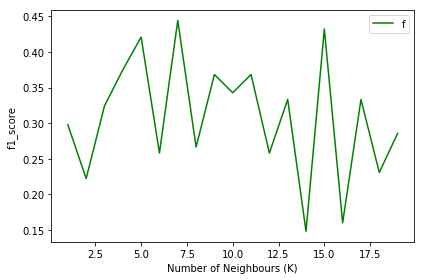

In [34]:
plt.plot(range(1,Ks),f1_,'g')
plt.legend(('f1_score '))
plt.ylabel('f1_score ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

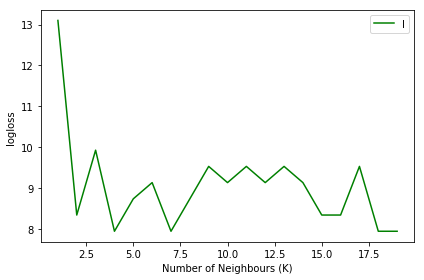

In [35]:
plt.plot(range(1,Ks),ll_,'g')
plt.legend(('logloss '))
plt.ylabel('logloss ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

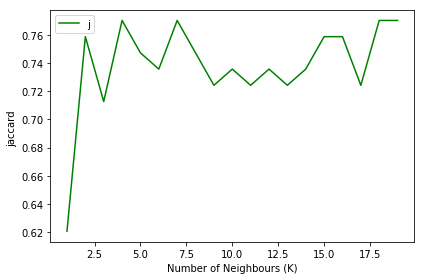

In [36]:
plt.plot(range(1,Ks),jc_,'g')
plt.legend(('jaccard '))
plt.ylabel('jaccard ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

In [37]:
print( "best accuracy (max) =", mean_acc.max(), "with k=", mean_acc.argmax()+1)  # mean_acc.argmax() -> Return indices of the maximum values along the given axis.
print('')
print( "best f1 score (max) =", f1_.max(), "with k=", f1_.argmax()+1) 
print('')
print( "best logloss (min) =", ll_.min(), "with k=", ll_.argmin()+1) 
print('')
print( "best jaccard sc (max) =", jc_.max(), "with k=", jc_.argmax()+1) 

best accuracy (max) = 0.770114942529 with k= 4

best f1 score (max) = 0.444444444444 with k= 7

best logloss (min) = 7.93995778731 with k= 18

best jaccard sc (max) = 0.770114942529 with k= 4


In [38]:
# final KNN model on whole data set
k = f1_.argmax()+1
KNN_4 = KNeighborsClassifier(n_neighbors = k).fit(X, y_dum_ok)
print(KNN_4)
f1_.argmax()+1

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')


7

# Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

depth_ = 20
mean_acc = np.zeros((depth_-1))
f1_ = np.zeros((depth_-1))
ll_ = np.zeros((depth_-1))
jc_ = np.zeros((depth_-1))

ConfustionMx = [];
for n in range(1,depth_):
    #Train 
    tree_ = DecisionTreeClassifier(criterion="entropy", class_weight ='balanced', random_state =123, max_depth = n).fit(X_train,Y_train)
    yhat=tree_.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)
    
    f1_[n-1] = metrics.f1_score(Y_test, yhat)
    ll_[n-1] = metrics.log_loss(Y_test, yhat)
    jc_[n-1] = metrics.jaccard_similarity_score(Y_test, yhat)

print('--acc--')
print(mean_acc)
print('--f1--')
print(f1_)
print('--logloss--')
print(ll_)
print('--jaccard--')
print(jc_)


# 1-Y_train.mean() 
# 0.735

# df_tmp = pd.DataFrame(data=Y_train)
# df_tmp.columns = ['col1']
# df_tmp['col1'].value_counts(normalize=True)
# 0    0.735537
# 1    0.264463

# yhat.mean()
# pd.concat([pd.DataFrame(Y_test), pd.DataFrame(yhat)], axis=1)


--acc--
[ 0.57471264  0.6091954   0.63218391  0.6091954   0.62068966  0.59770115
  0.62068966  0.63218391  0.59770115  0.6091954   0.66666667  0.66666667
  0.65517241  0.65517241  0.66666667  0.66666667  0.65517241  0.65517241
  0.65517241]
--f1--
[ 0.51948052  0.54054054  0.51515152  0.52777778  0.53521127  0.49275362
  0.50746269  0.46666667  0.42622951  0.43333333  0.47272727  0.45283019
  0.42307692  0.42307692  0.43137255  0.43137255  0.4         0.4         0.4       ]
--logloss--
[ 14.68922658  13.49820672  12.70416591  13.49819753  13.10119091
  13.89518577  13.10117253  12.70413833  13.895149    13.49814238
  11.51310928  11.51310009  11.91009752  11.91009752  11.5130909
  11.5130909   11.91008833  11.91008833  11.91008833]
--jaccard--
[ 0.57471264  0.6091954   0.63218391  0.6091954   0.62068966  0.59770115
  0.62068966  0.63218391  0.59770115  0.6091954   0.66666667  0.66666667
  0.65517241  0.65517241  0.66666667  0.66666667  0.65517241  0.65517241
  0.65517241]


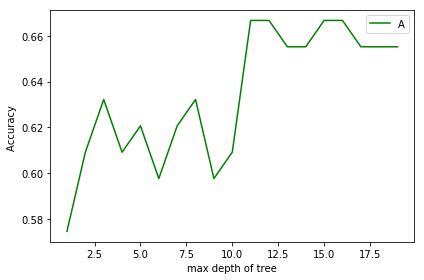

In [40]:
plt.plot(range(1,depth_),mean_acc,'g')
plt.legend(('Accuracy '))
plt.ylabel('Accuracy ')
plt.xlabel('max depth of tree')
plt.tight_layout()
plt.show()

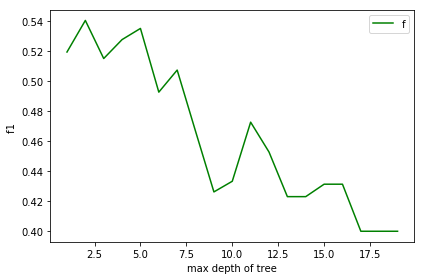

In [41]:
plt.plot(range(1,depth_),f1_,'g')
plt.legend(('f1 '))
plt.ylabel('f1 ')
plt.xlabel('max depth of tree')
plt.tight_layout()
plt.show()

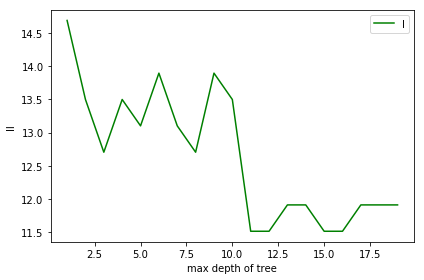

In [42]:
plt.plot(range(1,depth_),ll_,'g')
plt.legend(('ll '))
plt.ylabel('ll ')
plt.xlabel('max depth of tree')
plt.tight_layout()
plt.show()

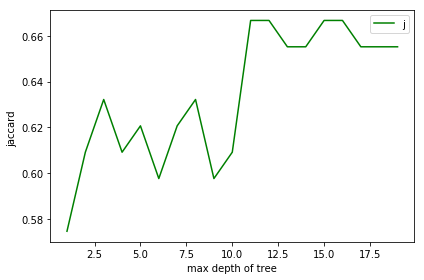

In [43]:
plt.plot(range(1,depth_),jc_,'g')
plt.legend(('jaccard '))
plt.ylabel('jaccard ')
plt.xlabel('max depth of tree')
plt.tight_layout()
plt.show()

In [44]:
print( "best accuracy (max)   =", mean_acc.max(), "with max_depth=", mean_acc.argmax()+1) 
print('')
print( "best f1 score (max)   =", f1_.max(), "with max_depth=", f1_.argmax()+1) 
print('')
print( "best logloss (min)    =", ll_.min(), "with max_depth=", ll_.argmin()+1) 
print('')
print( "best jaccard sc (max) =", jc_.max(), "with max_depth=", jc_.argmax()+1) 

best accuracy (max)   = 0.666666666667 with max_depth= 11

best f1 score (max)   = 0.540540540541 with max_depth= 2

best logloss (min)    = 11.5130908989 with max_depth= 15

best jaccard sc (max) = 0.666666666667 with max_depth= 11


In [45]:
# final model with max_depth = f1_.argmax()+1
tree_final = DecisionTreeClassifier(criterion="entropy", class_weight ='balanced', random_state =123, max_depth = f1_.argmax()+1).fit(X, y_dum_ok)
tree_final

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=2, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

# Support Vector Machine

In [46]:
from sklearn import svm
from sklearn.metrics import  confusion_matrix

# kern_ = ['linear', 'poly', 'rbf', 'sigmoid']
kern_ = 'sigmoid'
C_ = np.logspace(-3, 2, 40)


mean_acc = np.zeros((C_.size))
f1_ = np.zeros((C_.size))
ll_ = np.zeros((C_.size))
jc_ = np.zeros((C_.size))
ac_ = np.zeros((C_.size))

ConfustionMx = [];
for n in range(1,C_.size+1):
    #Train 
    svm_ = svm.SVC(kernel = kern_ , C = C_[n-1], class_weight='balanced').fit(X_train,Y_train)
    yhat=svm_.predict(X_test)
#     print(n, '---', kern_)
#     print(confusion_matrix(Y_test, yhat))
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)
    
    f1_[n-1] = metrics.f1_score(Y_test, yhat)
    ll_[n-1] = metrics.log_loss(Y_test, yhat)
    jc_[n-1] = metrics.jaccard_similarity_score(Y_test, yhat)
    
    # AUC / AUROC - good to find less frequent target - 1
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, yhat)
    ac_[n-1] = metrics.auc(fpr, tpr)

print('--acc--')
print(mean_acc)
print('--f1--')
print(f1_)
print('--logloss--')
print(ll_)
print('--jaccard--')
print(jc_)
print('--AUC--')
print(ac_)
print('--c--')
print(C_)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


--acc--
[ 0.74712644  0.74712644  0.74712644  0.74712644  0.74712644  0.74712644
  0.25287356  0.25287356  0.74712644  0.74712644  0.71264368  0.6091954
  0.57471264  0.57471264  0.57471264  0.57471264  0.57471264  0.57471264
  0.57471264  0.57471264  0.6091954   0.5862069   0.5862069   0.55172414
  0.57471264  0.57471264  0.56321839  0.55172414  0.54022989  0.57471264
  0.56321839  0.56321839  0.5862069   0.55172414  0.59770115  0.5862069
  0.5862069   0.56321839  0.56321839  0.64367816]
--f1--
[ 0.          0.          0.          0.          0.          0.
  0.40366972  0.40366972  0.          0.          0.46808511  0.54054054
  0.51948052  0.51948052  0.51948052  0.51948052  0.51948052  0.51948052
  0.51948052  0.51948052  0.52777778  0.47058824  0.47058824  0.45070423
  0.46376812  0.46376812  0.42424242  0.4         0.375       0.41269841
  0.38709677  0.38709677  0.4         0.38095238  0.40677966  0.4         0.4
  0.44117647  0.44117647  0.45614035]
--logloss--
[  8.73394346 

In [47]:
print('>>> Train final <<<')
svm_final = svm.SVC(C = C_[f1_.argmax()], kernel = 'sigmoid', class_weight='balanced').fit(X, y_dum_ok)
svm_final


>>> Train final <<<


SVC(C=0.025719138090593445, cache_size=200, class_weight='balanced',
  coef0=0.0, decision_function_shape='ovr', degree=3, gamma='auto',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

# Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

# C_ = np.arange(0.05 ,3, step=0.1)
C_ = np.logspace(-5, 5, 50)

mean_acc = np.zeros((C_.size))
f1_ = np.zeros((C_.size))
ll_ = np.zeros((C_.size))
jc_ = np.zeros((C_.size))
ac_ = np.zeros((C_.size))

ConfustionMx = [];
for n in range(1,C_.size+1):
    #Train 
    LR_  = LogisticRegression(C = C_[n-1], solver='liblinear').fit(X_train,Y_train)
    yhat = LR_.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)
    
    f1_[n-1] = metrics.f1_score(Y_test, yhat)
    ll_[n-1] = metrics.log_loss(Y_test, yhat)
    jc_[n-1] = metrics.jaccard_similarity_score(Y_test, yhat)
    
    # AUC / AUROC - good to find less frequent target - 1
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, yhat)
    ac_[n-1] = metrics.auc(fpr, tpr)

print('--acc--')
print(mean_acc)
print('--f1--')
print(f1_)
print('--logloss--')
print(ll_)
print('--jaccard--')
print(jc_)
print('--AUC--')
print(ac_)

--acc--
[ 0.70114943  0.70114943  0.70114943  0.70114943  0.70114943  0.70114943
  0.70114943  0.71264368  0.71264368  0.71264368  0.71264368  0.73563218
  0.73563218  0.72413793  0.72413793  0.75862069  0.74712644  0.74712644
  0.74712644  0.74712644  0.74712644  0.74712644  0.74712644  0.74712644
  0.74712644  0.77011494  0.77011494  0.77011494  0.77011494  0.77011494
  0.77011494  0.77011494  0.77011494  0.77011494  0.77011494  0.77011494
  0.77011494  0.77011494  0.77011494  0.77011494  0.77011494  0.77011494
  0.77011494  0.77011494  0.77011494  0.77011494  0.77011494  0.77011494
  0.77011494  0.77011494]
--f1--
[ 0.27777778  0.27777778  0.27777778  0.27777778  0.27777778  0.27777778
  0.27777778  0.28571429  0.28571429  0.28571429  0.28571429  0.3030303
  0.3030303   0.2         0.14285714  0.08695652  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.16666667  0.16666667  0.16666667  0.16666667  0.16666667  0.16666667
  0.16666667  0

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [49]:
print( "best accuracy (max)   =", mean_acc.max(), "with C=", C_[mean_acc.argmax()]) 
print('')
print( "best f1 score (max)   =", f1_.max(), "with C=", C_[f1_.argmax()]) 
print('')
print( "best logloss (min)    =", ll_.min(), "with C=", C_[ll_.argmin()]) 
print('')
print( "best jaccard sc (max) =", jc_.max(), "with C=", C_[jc_.argmax()]) 
print('')
print( "best AUC (max) =", ac_.max(), "with C=", C_[ac_.argmax()]) 

C_[f1_.argmax()]

best accuracy (max)   = 0.770114942529 with C= 1.26485521686

best f1 score (max)   = 0.30303030303 with C= 0.00175751062485

best logloss (min)    = 7.93994859653 with C= 1.26485521686

best jaccard sc (max) = 0.770114942529 with C= 1.26485521686

best AUC (max) = 0.567482517483 with C= 0.00175751062485


0.001757510624854793

In [50]:
# Train final - best  wit regualization C
LR_final = LogisticRegression(C = C_[f1_.argmax()] , solver='liblinear').fit(X, y_dum_ok)
LR_final


LogisticRegression(C=0.001757510624854793, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

# Model Evaluation using Test set

In [51]:
# from sklearn.metrics import jaccard_similarity_score
# from sklearn.metrics import f1_score
# from sklearn.metrics import log_loss
from sklearn import metrics

First, download and load the test set:

In [52]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2018-12-24 00:13:20--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2018-12-24 00:13:20 (703 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [53]:
test_df = pd.read_csv('loan_test.csv')
print(test_df.shape)
test_df.head()

(54, 10)


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


## PREPROCESSING LIKE TRAIN DATA (DUMMY, SCALING, ETC..)

In [54]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend']   = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [55]:
test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1,inplace=True)
test_Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [56]:
test_X = scaler.transform(test_Feature)
test_X[0:5]

array([[ 0.51578458,  0.92071769,  3.16061891,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [-5.89052444, -1.96168647,  0.67333883, -0.42056004,  0.82934003,
        -0.38170062, -0.87997669, -0.86968108],
       [ 0.51578458,  0.92071769,  1.9998882 ,  2.37778177,  0.82934003,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769, -0.81902922, -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [-1.31458942, -0.95911111, -0.3215732 , -0.42056004,  0.82934003,
         2.61985426, -0.87997669, -0.86968108]])

In [57]:
# test_X = test_Feature
# test_X = preprocessing.StandardScaler().fit(X).transform(test_X) # scaller fited on train data and transform new, test dataset
# test_X[0:5]

In [58]:
test_y = test_df['loan_status'].values
test_y_dum = pd.get_dummies(test_y)
test_y_dum.drop(['PAIDOFF'], axis = 1,inplace=True)
test_y_dum_ok = test_y_dum['COLLECTION'].values
test_y_dum_ok[:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

## SCORING TEST DATA

In [59]:
yhat_KNN  = KNN_4.predict(test_X)
yhat_TREE = tree_final.predict(test_X)
yhat_SVM  = svm_final.predict(test_X)
yhat_LR   = LR_final.predict(test_X)

print(test_y_dum_ok.mean())
print('-----')

print(yhat_KNN.mean())
print(yhat_TREE.mean())
print(yhat_SVM.mean())
print(yhat_LR.mean())

0.259259259259
-----
0.0925925925926
0.537037037037
0.62962962963
0.0185185185185


In [60]:
print(confusion_matrix(test_y_dum_ok, yhat_KNN))
print(confusion_matrix(test_y_dum_ok, yhat_TREE))
print(confusion_matrix(test_y_dum_ok, yhat_SVM))
print(confusion_matrix(test_y_dum_ok, yhat_LR))


[[37  3]
 [12  2]]
[[24 16]
 [ 1 13]]
[[19 21]
 [ 1 13]]
[[40  0]
 [13  1]]


In [61]:

yhat_iter  = [yhat_KNN, yhat_TREE, yhat_SVM, yhat_LR]
mean_acc = np.zeros((4))
f1_ = np.zeros((4))
ll_ = np.zeros((4))
jc_ = np.zeros((4))
ac_ = np.zeros((4))

ConfustionMx = [];
for n in range(1,5):
    mean_acc[n-1] = metrics.accuracy_score(test_y_dum_ok, yhat_iter[n-1])
    f1_[n-1] = metrics.f1_score(test_y_dum_ok, yhat_iter[n-1])
    ll_[n-1] = metrics.log_loss(test_y_dum_ok, yhat_iter[n-1])
    jc_[n-1] = metrics.jaccard_similarity_score(test_y_dum_ok, yhat_iter[n-1])
    
    # AUC / AUROC - good to find less frequent target - 1
    fpr, tpr, thresholds = metrics.roc_curve(test_y_dum_ok, yhat_iter[n-1])
    ac_[n-1] = metrics.auc(fpr, tpr)

print('[yhat_KNN, yhat_TREE, yhat_SVM, yhat_LR]')
print('--acc--')
print(mean_acc)
print('--f1--')
print(f1_)
print('--logloss--')
print(ll_)
print('--jaccard--')
print(jc_)
print('--AUC--')
print(ac_)


[yhat_KNN, yhat_TREE, yhat_SVM, yhat_LR]
--acc--
[ 0.72222222  0.68518519  0.59259259  0.75925926]
--f1--
[ 0.21052632  0.60465116  0.54166667  0.13333333]
--logloss--
[  9.59414898  10.87355541  14.0716643    8.31489061]
--jaccard--
[ 0.72222222  0.68518519  0.59259259  0.75925926]
--AUC--
[ 0.53392857  0.76428571  0.70178571  0.53571429]


In [62]:
# pd.concat([pd.DataFrame(test_y_dum_ok), pd.DataFrame(yhat_SVM)], axis=1)

## FINAL TABLE

In [63]:
Algo = ['KNN', 'Tree','SVM','LR']

print('')
print('Which model is the best? That is the question! And... it always depends...')
print('Looking only at accuracy might be missleading.. When you set all predictions to 0.. you have accuracy = ',1-test_y_dum_ok.mean())
print('Someone may think that it is not so bad, but... :) ')
print('When you want to find target =1 : COLLECTION, much better is to use tree or svm - quite good accuracy, f1 and auc - used balanced weights when fitting model')
print('')
pd.DataFrame({'Jaccard':jc_, 'F1':f1_, 'LogLoss':ll_, 'Accuracy':mean_acc, 'AUC':ac_}, index=Algo)


Which model is the best? That is the question! And... it always depends...
Looking only at accuracy might be missleading.. When you set all predictions to 0.. you have accuracy =  0.740740740741
Someone may think that it is not so bad, but... :) 
When you want to find target =1 : COLLECTION, much better is to use tree or svm - quite good accuracy, f1 and auc - used balanced weights when fitting model



,AUC,Accuracy,F1,Jaccard,LogLoss
KNN,0.533929,0.722222,0.210526,0.722222,9.594149
Tree,0.764286,0.685185,0.604651,0.685185,10.873555
SVM,0.701786,0.592593,0.541667,0.592593,14.071664
LR,0.535714,0.759259,0.133333,0.759259,8.314891


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>